# Data load

In [70]:
# import pygwalker as pyg

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [72]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [73]:
print(df.head())
df.info()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [74]:
# args = {
#     'random_state': 42,
#     'test_size': 0.2,
#     'n_estimators': 100
# }

In [75]:
# from easydict import EasyDict as edict

# args = edict({
#     'random_state': 42,
#     'test_size': 0.2,
#     'n_estimators': 100
# })

# Data review

In [76]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [77]:
df['customerID'].describe() # unique

count           7043
unique          7043
top       7590-VHVEG
freq               1
Name: customerID, dtype: object

In [78]:
df['gender'].describe() # sym

count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object

In [79]:
df['SeniorCitizen'].describe() # 고령자

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [80]:
df['Partner'].describe() # 결혼 했는가?

count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object

In [81]:
df['Dependents'].describe() # 부양 가족(자녀)이 있는가?

count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object

In [82]:
df['tenure'].describe() # 구독 기간(개월)

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [83]:
df['PhoneService'].describe() # category, Yes에 편향향

count     7043
unique       2
top        Yes
freq      6361
Name: PhoneService, dtype: object

In [84]:
df['MultipleLines'].describe(), df['MultipleLines'].unique() # Yes/No/ NaN

(count     7043
 unique       3
 top         No
 freq      3390
 Name: MultipleLines, dtype: object,
 array(['No phone service', 'No', 'Yes'], dtype=object))

In [85]:
df['InternetService'].describe(), df['InternetService'].unique()

(count            7043
 unique              3
 top       Fiber optic
 freq             3096
 Name: InternetService, dtype: object,
 array(['DSL', 'Fiber optic', 'No'], dtype=object))

In [86]:
df['OnlineSecurity'].describe(), df['OnlineSecurity'].unique()

(count     7043
 unique       3
 top         No
 freq      3498
 Name: OnlineSecurity, dtype: object,
 array(['No', 'Yes', 'No internet service'], dtype=object))

In [87]:
df['OnlineBackup'].describe(), df['OnlineBackup'].unique()

(count     7043
 unique       3
 top         No
 freq      3088
 Name: OnlineBackup, dtype: object,
 array(['Yes', 'No', 'No internet service'], dtype=object))

In [88]:
df['DeviceProtection'].describe(), df['DeviceProtection'].unique()

(count     7043
 unique       3
 top         No
 freq      3095
 Name: DeviceProtection, dtype: object,
 array(['No', 'Yes', 'No internet service'], dtype=object))

In [89]:
df['TechSupport'].describe(), df['TechSupport'].unique()

(count     7043
 unique       3
 top         No
 freq      3473
 Name: TechSupport, dtype: object,
 array(['No', 'Yes', 'No internet service'], dtype=object))

In [90]:
df['StreamingTV'].describe(), df['StreamingTV'].unique()

(count     7043
 unique       3
 top         No
 freq      2810
 Name: StreamingTV, dtype: object,
 array(['No', 'Yes', 'No internet service'], dtype=object))

In [91]:
df['StreamingMovies'].describe(), df['StreamingMovies'].unique()

(count     7043
 unique       3
 top         No
 freq      2785
 Name: StreamingMovies, dtype: object,
 array(['No', 'Yes', 'No internet service'], dtype=object))

In [92]:
df['Contract'].describe(), df['Contract'].unique() # 단위 계약 m2m = 월단위 구독, 1y = 연간 구독, 2y = 2년 구독

(count               7043
 unique                 3
 top       Month-to-month
 freq                3875
 Name: Contract, dtype: object,
 array(['Month-to-month', 'One year', 'Two year'], dtype=object))

In [93]:
df['PaperlessBilling'].describe(), df['PaperlessBilling'].unique() # 전자 청구서 유무 yes = 전자 청구서/ No = 종이 청구서

(count     7043
 unique       2
 top        Yes
 freq      4171
 Name: PaperlessBilling, dtype: object,
 array(['Yes', 'No'], dtype=object))

In [94]:
df['PaymentMethod'].describe(), df['PaymentMethod'].unique() 
# 결제 방법 
# 'Electronic check' - 전자 수표, 
# 'Mailed check' - offline 수표, 
# 'Bank transfer (automatic)' - 은행 송금(자동),
# 'Credit card (automatic)' - 신용카드 (자동)

(count                 7043
 unique                   4
 top       Electronic check
 freq                  2365
 Name: PaymentMethod, dtype: object,
 array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
        'Credit card (automatic)'], dtype=object))

In [95]:
df['MonthlyCharges'].describe() # 월간 지불액

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [96]:
df['TotalCharges'].describe() # 사용 기간동안 지불했던 총 금액

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [97]:
df['Churn'].describe(), df['Churn'].unique() # target // yes = 이탈한 사람

(count     7043
 unique       2
 top         No
 freq      5174
 Name: Churn, dtype: object,
 array(['No', 'Yes'], dtype=object))

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [99]:
# df['TotalCharges'].astype(float)

In [100]:
# to_numeric -> 문자열 숫자 -> 숫자로 변경 / error 발생시 NaN으로 강제 변경
# fillna(0) -> NaN값을 0으로 변경
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

In [101]:
df['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [102]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [103]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

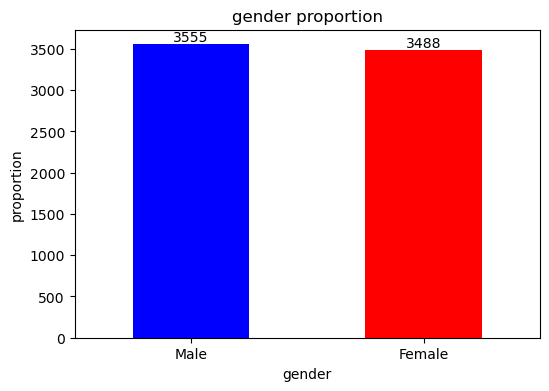

In [104]:
gender_count = df['gender'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('gender proportion')
plt.xlabel('gender')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

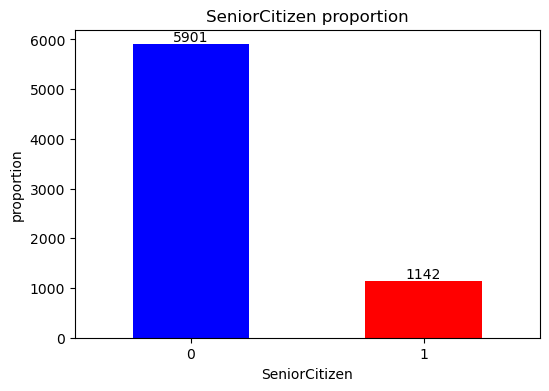

In [105]:
gender_count = df['SeniorCitizen'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('SeniorCitizen proportion')
plt.xlabel('SeniorCitizen')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

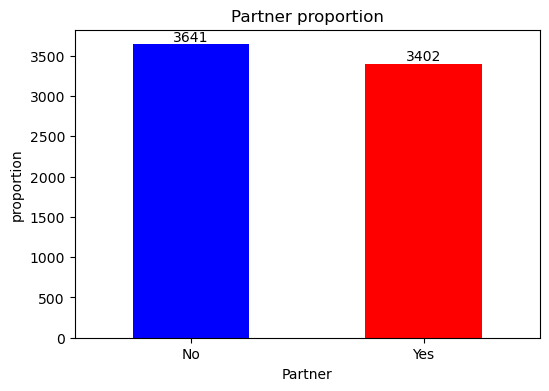

In [106]:
gender_count = df['Partner'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('Partner proportion')
plt.xlabel('Partner')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

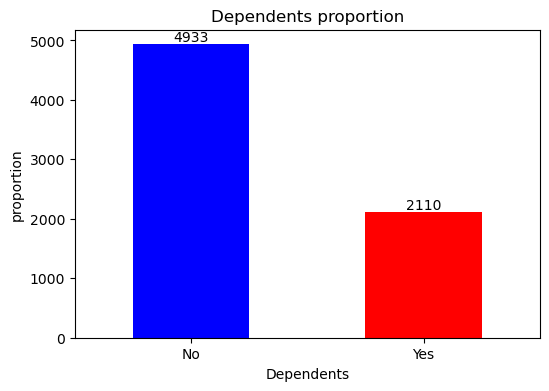

In [107]:
gender_count = df['Dependents'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('Dependents proportion')
plt.xlabel('Dependents')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

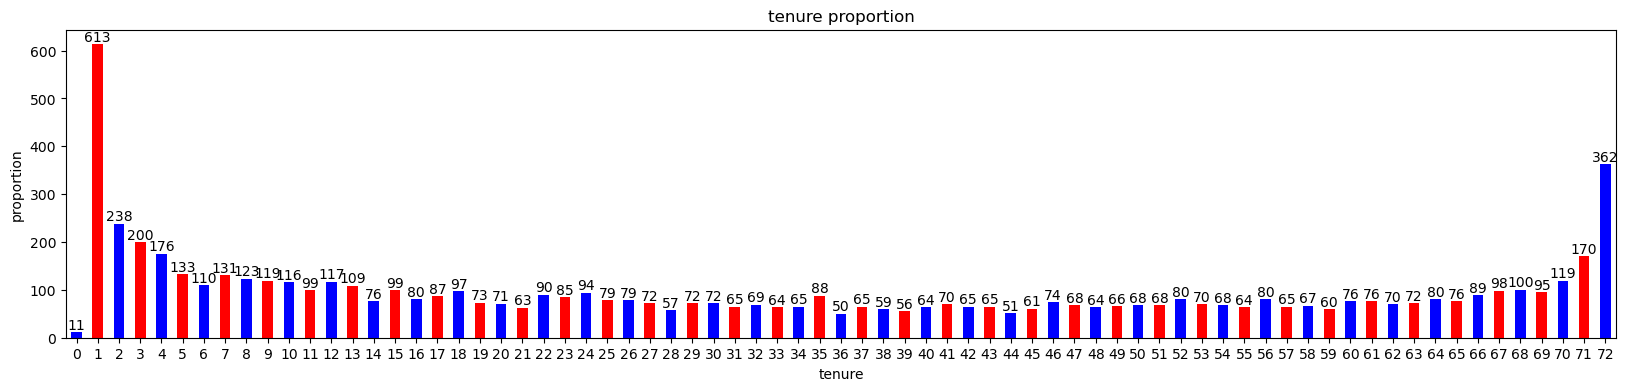

In [108]:
gender_count = df['tenure'].value_counts()



# gender의 순서를 유지하기 위해 x축의 값을 기준으로 정렬하여 막대 그래프를 그리기
gender_counts_sorted = gender_count.sort_index()  # gender 값을 기준으로 정렬

plt.figure(figsize=(20,4))
bars = gender_counts_sorted.plot(kind='bar', color=['blue', 'red'])



plt.title('tenure proportion')
plt.xlabel('tenure')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

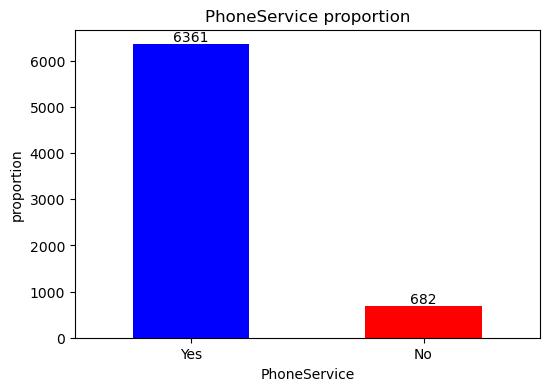

In [109]:
gender_count = df['PhoneService'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('PhoneService proportion')
plt.xlabel('PhoneService')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

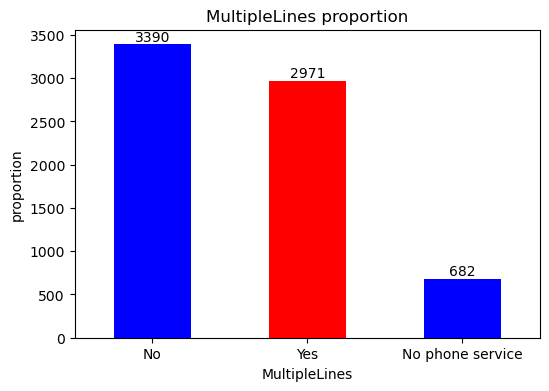

In [110]:
gender_count = df['MultipleLines'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('MultipleLines proportion')
plt.xlabel('MultipleLines')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

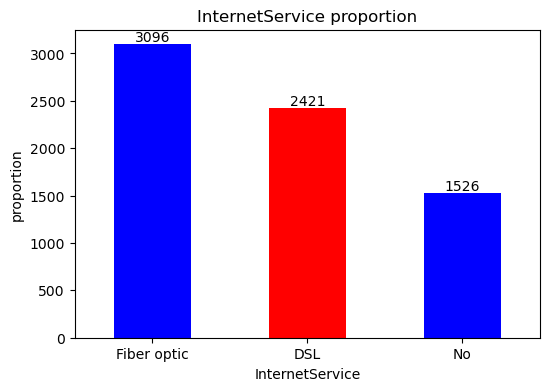

In [111]:
gender_count = df['InternetService'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('InternetService proportion')
plt.xlabel('InternetService')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

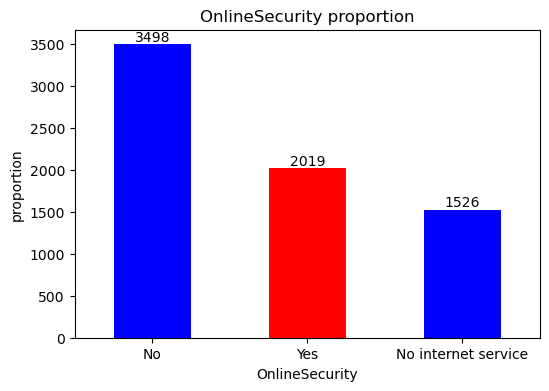

In [112]:
gender_count = df['OnlineSecurity'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('OnlineSecurity proportion')
plt.xlabel('OnlineSecurity')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

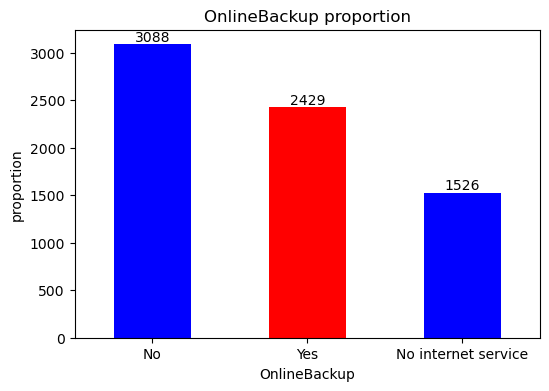

In [113]:
gender_count = df['OnlineBackup'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('OnlineBackup proportion')
plt.xlabel('OnlineBackup')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

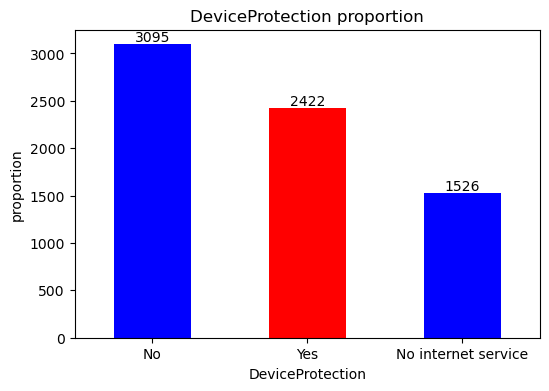

In [114]:
gender_count = df['DeviceProtection'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('DeviceProtection proportion')
plt.xlabel('DeviceProtection')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

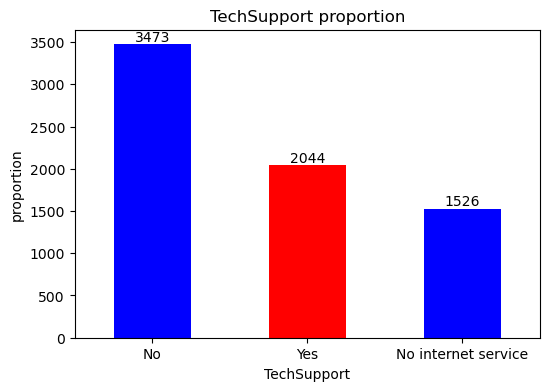

In [115]:
gender_count = df['TechSupport'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('TechSupport proportion')
plt.xlabel('TechSupport')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

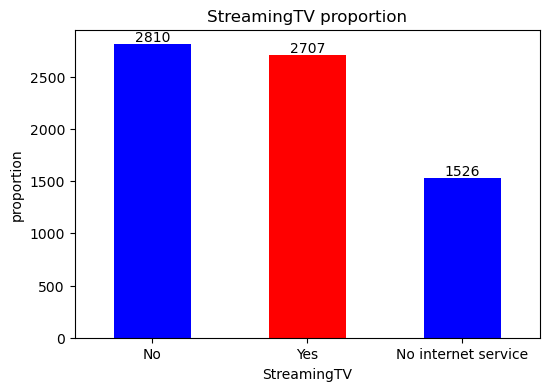

In [116]:
gender_count = df['StreamingTV'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('StreamingTV proportion')
plt.xlabel('StreamingTV')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

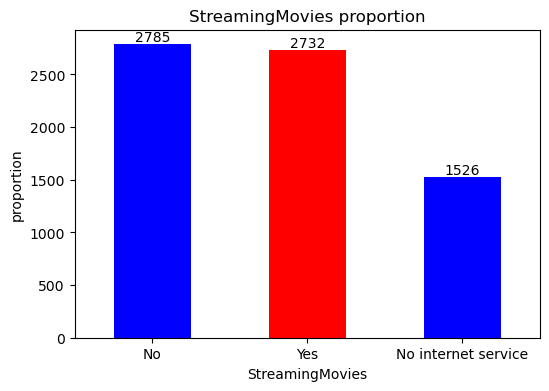

In [117]:
gender_count = df['StreamingMovies'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('StreamingMovies proportion')
plt.xlabel('StreamingMovies')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

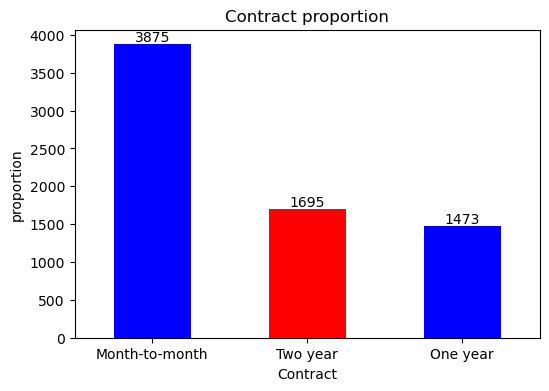

In [118]:
gender_count = df['Contract'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('Contract proportion')
plt.xlabel('Contract')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

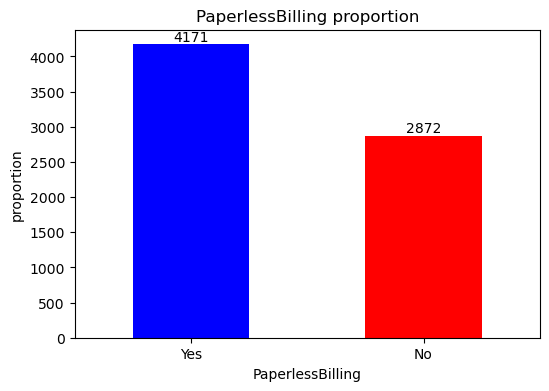

In [119]:
gender_count = df['PaperlessBilling'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('PaperlessBilling proportion')
plt.xlabel('PaperlessBilling')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

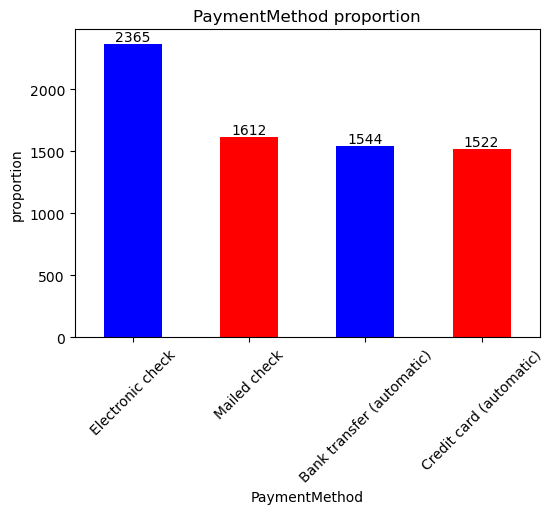

In [120]:
gender_count = df['PaymentMethod'].value_counts()

plt.figure(figsize=(6,4))
bars = gender_count.plot(kind='bar', color=['blue', 'red'])

plt.title('PaymentMethod proportion')
plt.xlabel('PaymentMethod')
plt.ylabel('proportion')
plt.xticks(rotation=45)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

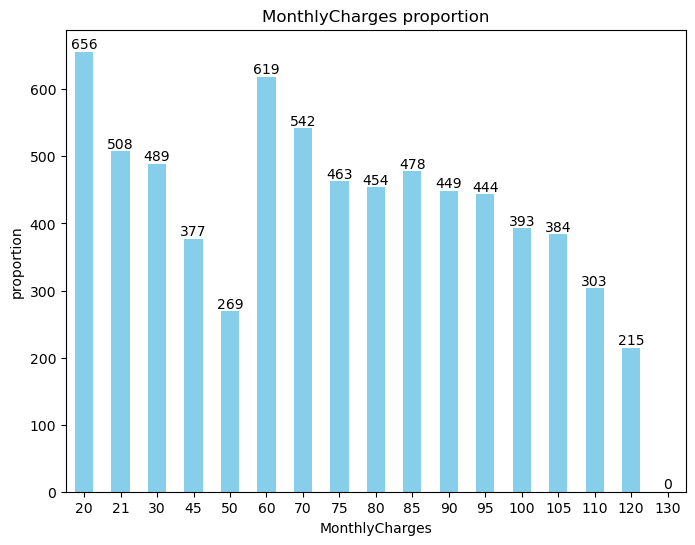

In [121]:
# 1. MonthlyCharges 구간 나누기 (예: 5개의 구간으로 나눔)
bins = [0, 20, 21, 30, 45, 50, 60, 70, 75, 80, 85, 90, 95, 100, 105, 110, 120, 130]  # 구간 설정
labels = [20, 21, 30, 45, 50, 60, 70, 75, 80, 85, 90, 95, 100, 105, 110, 120, 130]  # 구간에 대한 레이블

# 구간별로 데이터 나누기
df['MonthlyCharges_Binned'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, include_lowest=True)

# 2. 구간별 빈도수 계산
charges_binned_counts = df['MonthlyCharges_Binned'].value_counts().sort_index()

# 3. 구간별 데이터를 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
bars = charges_binned_counts.plot(kind='bar', color='skyblue')

plt.title('MonthlyCharges proportion')
plt.xlabel('MonthlyCharges')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

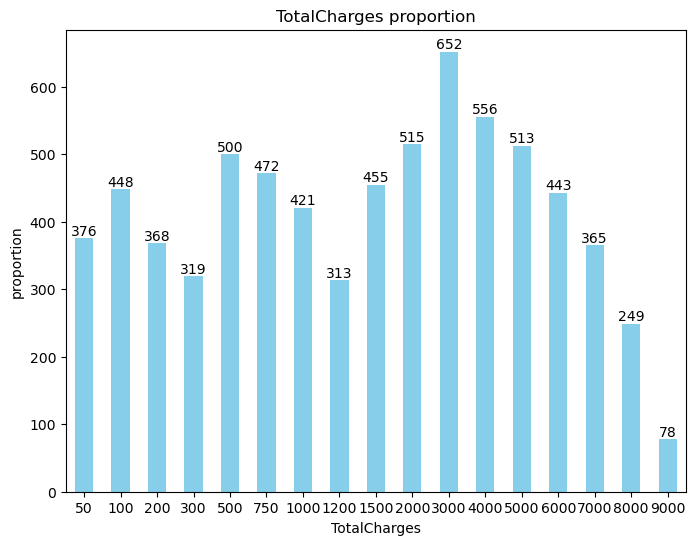

In [122]:
# 1. MonthlyCharges 구간 나누기 (예: 5개의 구간으로 나눔)
bins = [0, 50, 100, 200, 300, 500, 750, 1000, 1200, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]  # 구간 설정
labels = [50, 100, 200, 300, 500, 750, 1000, 1200, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]  # 구간에 대한 레이블

# 구간별로 데이터 나누기
df['TotalCharges_Binned'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels, include_lowest=True)

# 2. 구간별 빈도수 계산
charges_binned_counts = df['TotalCharges_Binned'].value_counts().sort_index()

# 3. 구간별 데이터를 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
bars = charges_binned_counts.plot(kind='bar', color='skyblue')

plt.title('TotalCharges proportion')
plt.xlabel('TotalCharges')
plt.ylabel('proportion')
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 막대의 중앙에 위치하게 x 좌표 계산
        bar.get_height(),  # 막대의 높이 위에 값을 표시
        f'{bar.get_height():d}',  # 표시할 값 (소수점 2자리로 표현)
        ha='center',  # 가로 정렬: 중앙
        va='bottom'  # 세로 정렬: 막대 위에 표시
    )

plt.show()

In [123]:
df.columns
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# data encoding

In [124]:
# encoding
df.drop(columns=['customerID'], inplace=True)
df['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
df['Partner'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Dependents'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['PhoneService'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['MultipleLines'].replace({'No phone service': 2, 'No': 0, 'Yes': 1}, inplace=True)
df['InternetService'].replace({'No': 0, 'DSL': 1, 'Fiber optic': 2}, inplace=True)
df['OnlineSecurity'].replace({'No': 0, 'No internet service': 2, 'Yes': 1}, inplace=True)
df['OnlineBackup'].replace({'No': 0, 'No internet service': 2, 'Yes': 1}, inplace=True)
df['DeviceProtection'].replace({'No': 0, 'No internet service': 2, 'Yes': 1}, inplace=True)
df['TechSupport'].replace({'No': 0, 'No internet service': 2, 'Yes': 1}, inplace=True)
df['StreamingTV'].replace({'No': 0, 'No internet service': 2, 'Yes': 1}, inplace=True)
df['StreamingMovies'].replace({'No': 0, 'No internet service': 2, 'Yes': 1}, inplace=True)
df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2}, inplace=True)
df['PaperlessBilling'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}, inplace=True)
df['MonthlyCharges_Binned'].replace({'20': 0, '21': 1, '30': 2, '45': 3, '50': 4, '60': 5, '70': 6, '75': 7, '80': 8, '85': 9, '90': 10, '95': 11, '100': 12, '105': 13, '110': 14, '120': 15, '130': 16}, inplace=True)
df['TotalCharges_Binned'].replace({'50': 0, '100': 1, '200': 2, '300': 3, '500': 4, '750': 5, '1000': 6, '1200': 7, '1500': 8, '2000': 9, '3000': 10, '4000': 11, '5000': 12, '6000': 13, '7000': 14, '8000': 15, '9000': 16}, inplace=True)
df.columns

C:\Users\USER\AppData\Local\Temp\ipykernel_15128\2817762342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15128\2817762342.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace({

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MonthlyCharges_Binned',
       'TotalCharges_Binned'],
      dtype='object')

In [125]:
# df['Charges_Binned'].value_counts()
# df.drop(columns=['Charges_Binned'], inplace=True)

df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 7043 non-null   int64   
 1   SeniorCitizen          7043 non-null   int64   
 2   Partner                7043 non-null   int64   
 3   Dependents             7043 non-null   int64   
 4   tenure                 7043 non-null   int64   
 5   PhoneService           7043 non-null   int64   
 6   MultipleLines          7043 non-null   int64   
 7   InternetService        7043 non-null   int64   
 8   OnlineSecurity         7043 non-null   int64   
 9   OnlineBackup           7043 non-null   int64   
 10  DeviceProtection       7043 non-null   int64   
 11  TechSupport            7043 non-null   int64   
 12  StreamingTV            7043 non-null   int64   
 13  StreamingMovies        7043 non-null   int64   
 14  Contract               7043 non-null   i

In [126]:
# transform & scale

In [127]:
df.drop(columns=['MonthlyCharges'], inplace=True)
df.drop(columns=['TotalCharges'], inplace=True)

# train test split

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

SEED = 42

y = df['Churn']
X = df.drop(columns='Churn', inplace= False)

In [129]:
X.shape, y.shape

((7043, 19), (7043,))

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=SEED, stratify = y)

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_Binned,TotalCharges_Binned
3738,1,0,0,0,35,0,2,1,0,0,1,0,1,1,0,0,0,50,2000
3151,1,0,1,1,15,1,0,2,1,0,0,0,0,0,0,0,1,80,1200
4860,1,0,1,1,13,0,2,1,1,1,0,1,0,0,2,0,1,45,750
3867,0,0,1,0,26,1,0,1,0,1,1,0,1,1,2,1,3,75,2000
3810,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,45,50


# apply logistic regression


In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
best_score = 0
best_c = 0

for c in [0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094]:
    model = LogisticRegression(C=c, random_state=SEED)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_c = c



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [133]:
print(best_score, best_c)

0.8005677785663591 0.0088


# apply HPO logistic regression


In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    
    # 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='RdYlGn')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # 확률로 표시하고 싶다면 아래 코드를 사용하세요
    # sns.heatmap(confusion / np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
최적 파라미터: {'tol': 8e-05, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 301, 'fit_intercept': True, 'class_weight': None, 'C': 0.014}
최고 정확도: 0.8054649244051625
오차 행렬
[[918 117]
 [166 208]]


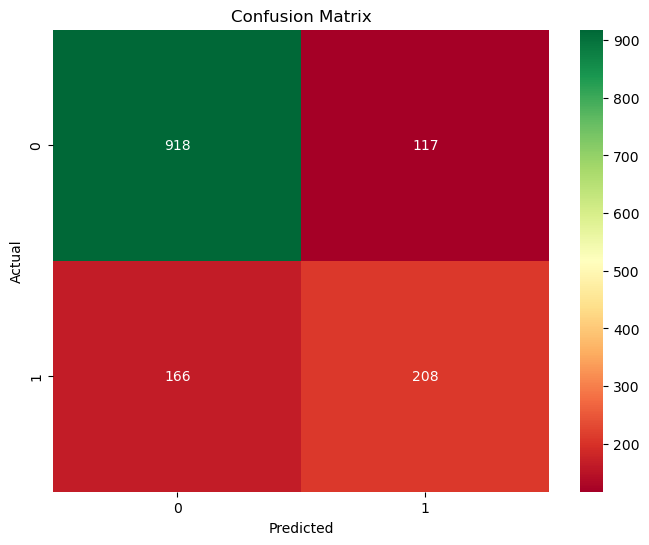

정확도: 0.7991, 정밀도: 0.6400, 재현율: 0.5561, F1:0.5951


In [135]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'C': [0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02],
    'penalty': ['l2'],
    'solver': ['liblinear',],
    'max_iter': [298, 299, 300, 301, 302, 303],
    'class_weight': [None, 'balanced'],
    'tol': [0.00007, 0.00008, 0.00009, 0.0001, 0.0011],
    'fit_intercept': [True, False]
}

random_search = RandomizedSearchCV(LogisticRegression(random_state=SEED), param_grid, cv=5, scoring='accuracy', n_iter=100, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

print("최적 파라미터:", random_search.best_params_)
print("최고 정확도:", random_search.best_score_)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

get_clf_eval(y_test , y_pred)

In [136]:
import pandas as pd

# 상관관계 행렬 계산
correlation_matrix = df.corr()

# 상관관계 행렬 출력
# print(correlation_matrix)


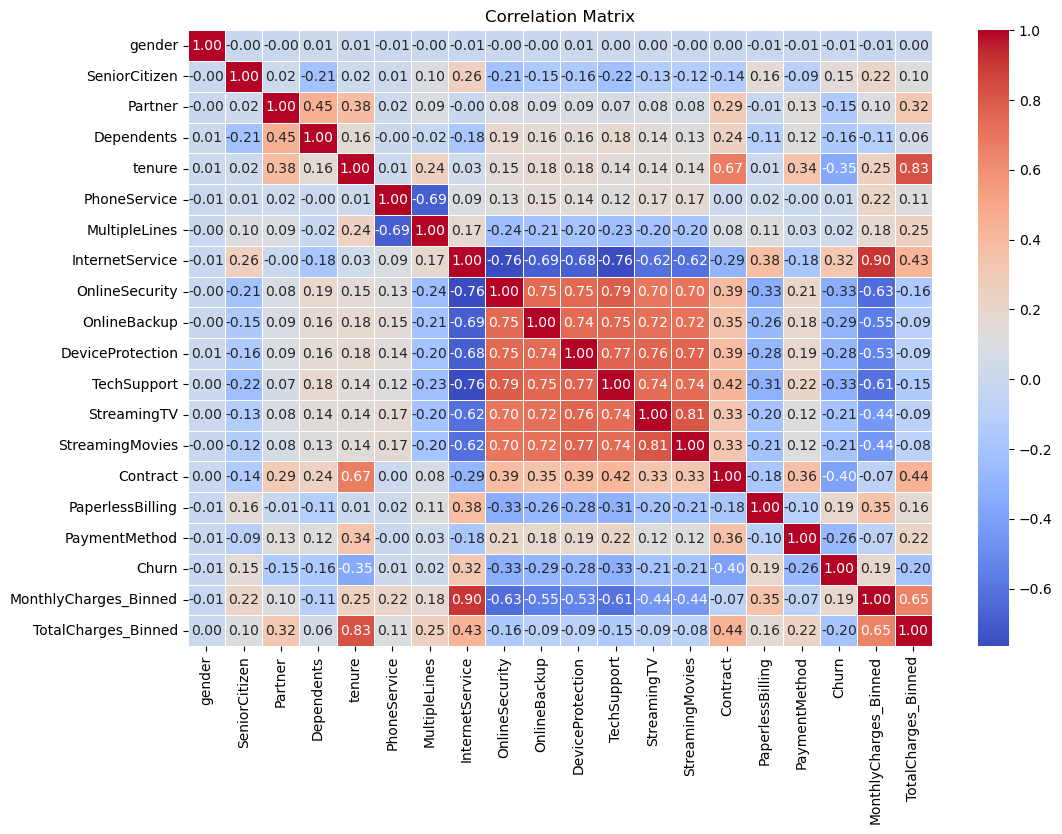

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


0.8422098220052183


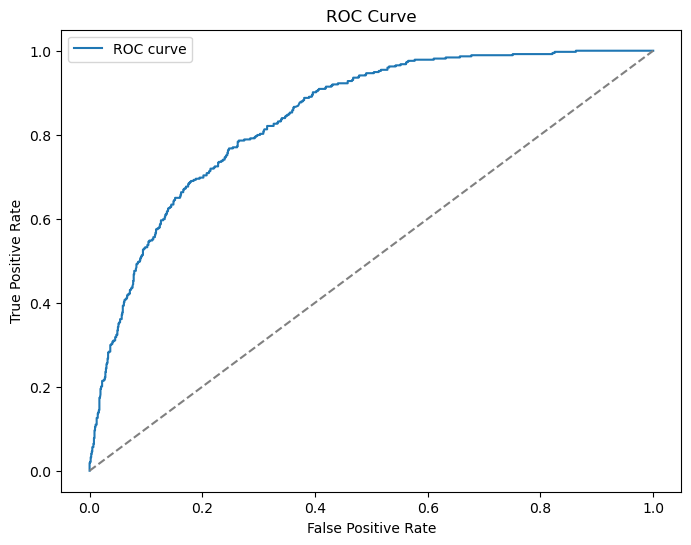

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 예측 확률 계산
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print(auc(fpr, tpr))

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [139]:
# import pickle

# pickle.dump(best_model, open('best_model.pkl', 'wb'))

# loaded_model = pickle.load(open('best_model.pkl', 'rb'))

# y_pred = loaded_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)



# apply randomforest

In [140]:
# apply HPO logistic regression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    
    # 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='RdYlGn')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # 확률로 표시하고 싶다면 아래 코드를 사용하세요
    # sns.heatmap(confusion / np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))


오차 행렬
[[922 113]
 [193 181]]


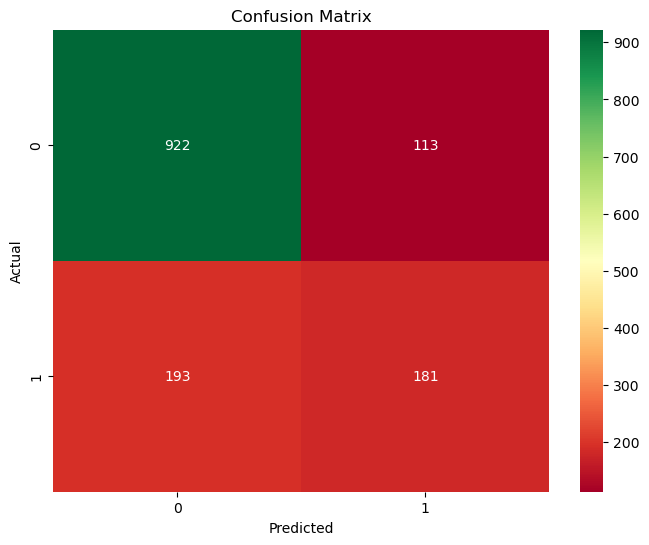

정확도: 0.7828, 정밀도: 0.6156, 재현율: 0.4840, F1:0.5419


In [141]:

from sklearn.ensemble import RandomForestClassifier
SEED = 42

model = RandomForestClassifier(random_state=SEED)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

get_clf_eval(y_test, y_pred)


In [142]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=SEED), param_grid, cv=5, scoring='accuracy', n_iter=100, n_jobs=-1, verbose=2)

random_search.fit(X_train, y_train)

print("최적 파라미터:", random_search.best_params_)
print("최고 정확도:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
200 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
128 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\USER\anaconda3\Lib\site-packages\sk

최적 파라미터: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 40, 'class_weight': None, 'bootstrap': True}
최고 정확도: 0.7988972436607665


오차 행렬
[[939  96]
 [192 182]]


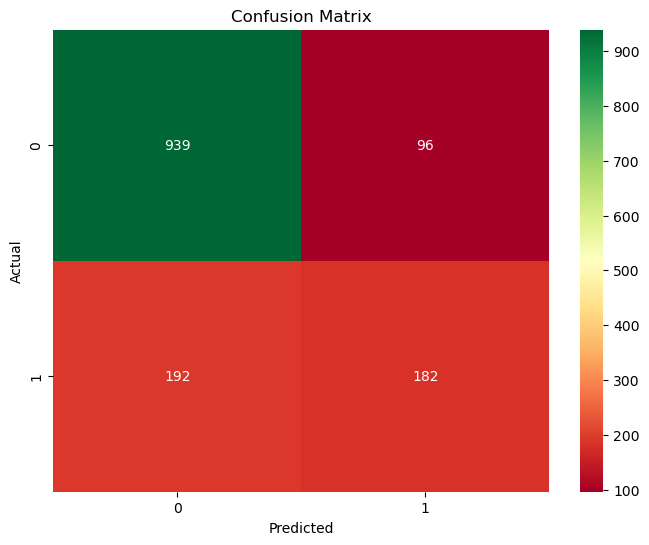

정확도: 0.7956, 정밀도: 0.6547, 재현율: 0.4866, F1:0.5583


In [143]:

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

get_clf_eval(y_test , y_pred)


In [144]:

import pandas as pd

# 상관관계 행렬 계산
correlation_matrix = df.corr()

# 상관관계 행렬 출력
# print(correlation_matrix)


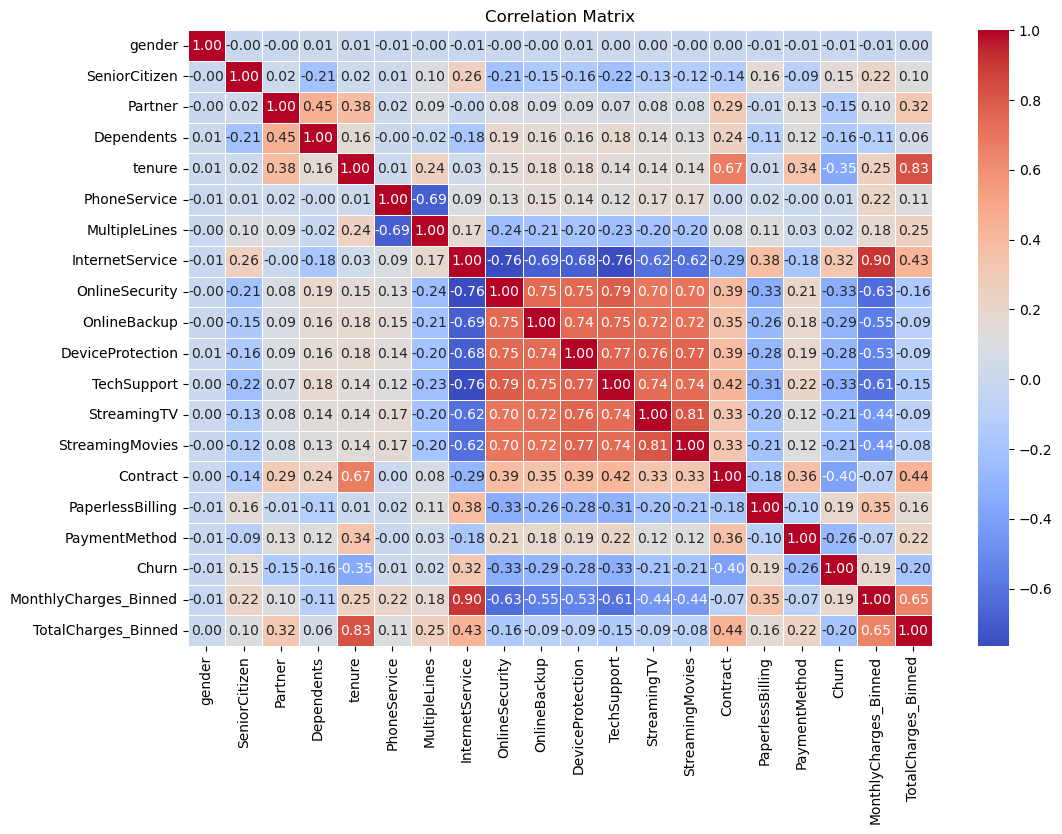

In [145]:

import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [146]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 예측 확률 계산
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print(auc(fpr, tpr))


0.8412100545092872


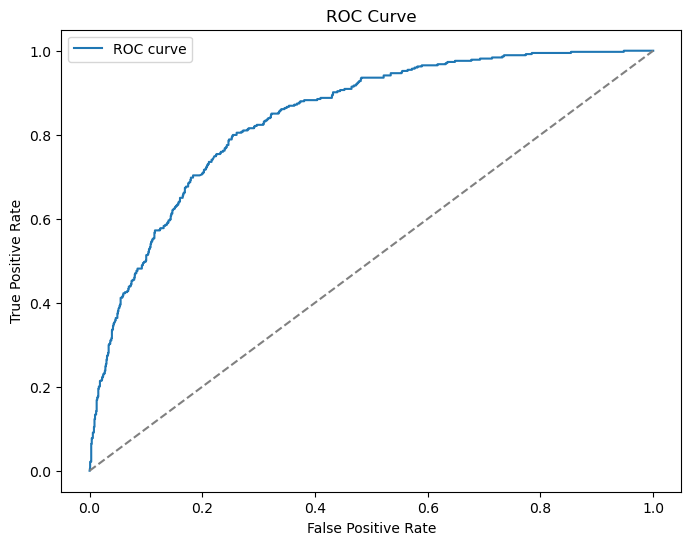

In [147]:

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
# import pickle

# pickle.dump(best_model, open('best_model.pkl', 'wb'))

# loaded_model = pickle.load(open('best_model.pkl', 'rb'))

# y_pred = loaded_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

